In [ ]:
# 5장 2절 - 합성곱 신경망 맛보기
""" 
테스트를 위한 데이터 : fashion_mnist 데이터셋(운동화, 셔츠, 샌들 같은 작은 이미지로 구성된 데이터)
 - 기본 MNIST 데이터셋처럼 열 가지 분류될 수 있는 28x28 픽셀 이미지 7만 개로 구성되어 있음
 - 훈련 데이터는 0~255 사이의 값을 가지는 28x28 크기의 넘파이 배열
 - 레이블(정답) 데이터는 0~9 정수 값을 갖는 배열
    *0:T-shirt, 1:Trouser, 2:Pullover, 3:Dress, 4:Coat, 5:Sandal, 6:Shirt, 7:Sneaker, 8:Bag, 9:Ankel boot
"""

In [6]:
# 라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 데이터 불러오기
fashion_mnist = tf.keras.datasets.fashion_mnist
# 훈련 및 레이블 데이터 만들기
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# X_train[0].size       -> 784 = 28*28

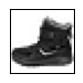

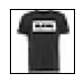

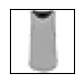

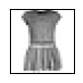

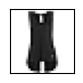

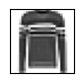

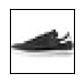

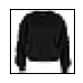

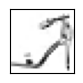

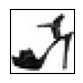

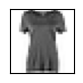

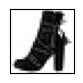

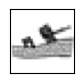

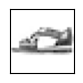

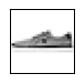

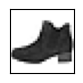

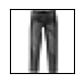

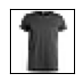

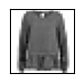

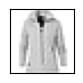

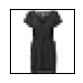

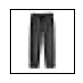

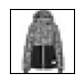

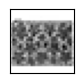

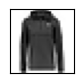

In [7]:
# 분류에 사용할 클래스 정의
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.show()

In [8]:
# 합성곱 신경망과 심층신경망 비교
# 심층 신경망 이용하여 네트워크 구성

X_train, X_test = X_train / 255.0, X_test / 255.0       # 이미지를 255로 나눔(참고자료)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0,2),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 평가
model.fit(X_train, y_train, epochs=5)               # 훈련 데이터셋을 이용한 모델 훈련
model.evaluate(X_test, y_test, verbose=2)    # 검증 데이터셋을 이용하여 모델 평가

Epoch 1/5


d:\kim\TensorFlow\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7826 - loss: 0.6307
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8609 - loss: 0.3875
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8769 - loss: 0.3345
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8847 - loss: 0.3166
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8896 - loss: 0.2943
313/313 - 0s - 1ms/step - accuracy: 0.8763 - loss: 0.3490


[0.34895843267440796, 0.8762999773025513]

In [9]:
# 데이터 전처리 - 훈련 데이터 및 검증 데이터에 대해 255. 로 나눔 처리
X_train_final = X_train.reshape((-1,28,28,1)) / 255.
X_test_final = X_test.reshape((-1,28,28,1)) / 255.

In [10]:
# 합성곱 네트워크를 이용한 모델 생성
model_with_conv = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련 및 성능 평가
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5


d:\kim\TensorFlow\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5661 - loss: 1.1629
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7918 - loss: 0.5622
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8221 - loss: 0.4863
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8385 - loss: 0.4426
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8533 - loss: 0.4053
313/313 - 1s - 4ms/step - accuracy: 0.8464 - loss: 0.4226


[0.4225834906101227, 0.8464000225067139]

In [11]:
# 5장 3절 - 전이학습
# ImageNet 데이터에 대해 가중치가 선행 학습된 ResNet50 모델 사용

# 라이브러리 호출
import numpy as np                                                                                                                                  # type:ignore
import tensorflow as tf                                                                                                                             # type:ignore
import matplotlib.pyplot as plt                                                                                                                # type:ignore
import matplotlib.image as mpimg                                                                                                         # type:ignore

from tensorflow.keras import Model                                                                                                      # type:ignore
from tensorflow.keras.models import Sequential                                                                                # type:ignore
from tensorflow.keras.layers import Dense, GlobalMaxPool2D, GlobalAveragePooling2D         # type:ignore
from tensorflow.keras.applications import ResNet50                                                                         # type:ignore
from tensorflow.keras.preprocessing.image import ImageDataGenerator                                     # type:ignore

# 사전 훈련된 모델 내려받기
model = ResNet50(
    include_top=True, 
    weights="imagenet", 
    input_tensor=None, 
    input_shape=None, 
    pooling=None, 
    classes=1000
    )

# ResNet50 네트워크에 밀집층 추가
model.trainable = False
model = Sequential([model, Dense(2, activation='sigmoid')])
model.summary()

"""
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                    ┃ Output Shape                             ┃       Param #            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                                    │ (None, 1000)                             │    25,636,712          │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                                           │ (None, 2)                                     │         2,002               │
└─────────────────────────────────┴────────────────────────┴───────────────┘
(None, 1000) -> 1000개의 출력을 가진 ResNet50 네트워크
(None, 2) -> 2개의 출력을 가진 밀집층       * cat인지 dog인지 분류
"""

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 1000)           │    25,636,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │         2,002 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,638,714 (97.80 MB)

 Trainable params: 2,002 (7.82 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

In [12]:
# 훈련에 사용될 환경 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
BATCH_SIZE = 32
image_height = 224
image_width = 224
# 캐글에서 제공하는 개와 고양이 이미지
train_dir = "./data/catanddog/train"
valid_dir = "./data/catanddog/validation"

# 이미지 훈련 데이터 전처리 - ImageDataGenerator
# 전처리 작업 객체 생성
train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1
)
train_generator = train.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode="categorical"
)
# 검증 데이터 객체 생성
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    seed=7,
    shuffle=True,
    class_mode="categorical"
)
# 훈련 실행
history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=2)

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


d:\kim\TensorFlow\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
13/13 - 15s - 1s/step - accuracy: 0.5273 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10
13/13 - 10s - 741ms/step - accuracy: 0.5273 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10
13/13 - 10s - 763ms/step - accuracy: 0.5273 - loss: 0.6929 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/10
13/13 - 10s - 758ms/step - accuracy: 0.5273 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/10
13/13 - 10s - 775ms/step - accuracy: 0.5273 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/10
13/13 - 10s - 753ms/step - accuracy: 0.5273 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/10
13/13 - 10s - 773ms/step - accuracy: 0.5273 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/10
13/13 - 10s - 765ms/step - accuracy: 0.5273 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 9/10
13/13 - 10s - 782ms/step - accuracy: 0.5273 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.

Text(0.5, 1.0, '오차')

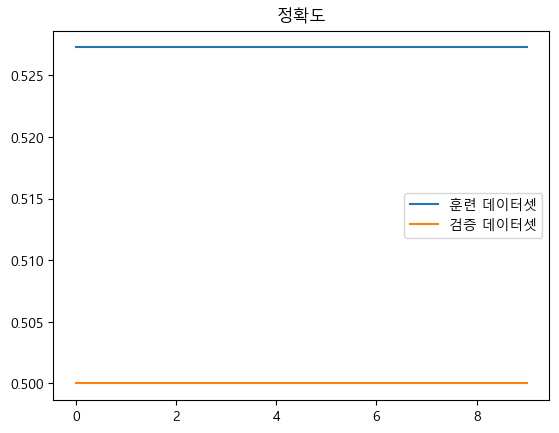

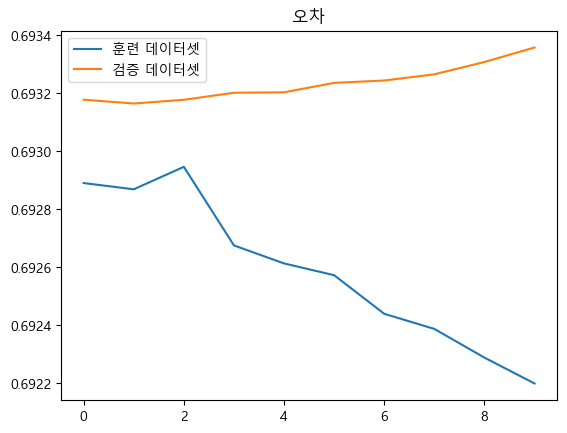

In [13]:
# 모델의 정확도 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager

# matplotlib에는 한글 인코딩 값이 없음 -> 한글 깨짐 현상
font_fname = 'C:/Windows/Fonts/malgun.ttf'      # 주피터 노트북에서 한글 깨지는 문제 해결
font_family = font_manager.FontProperties(fname=font_fname).get_name()      # 폰트 패밀리 값 알아오기
plt.rcParams["font.family"] = font_family       # plt에 폰트 설정

# 모델 정확도 그래프 그리기
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


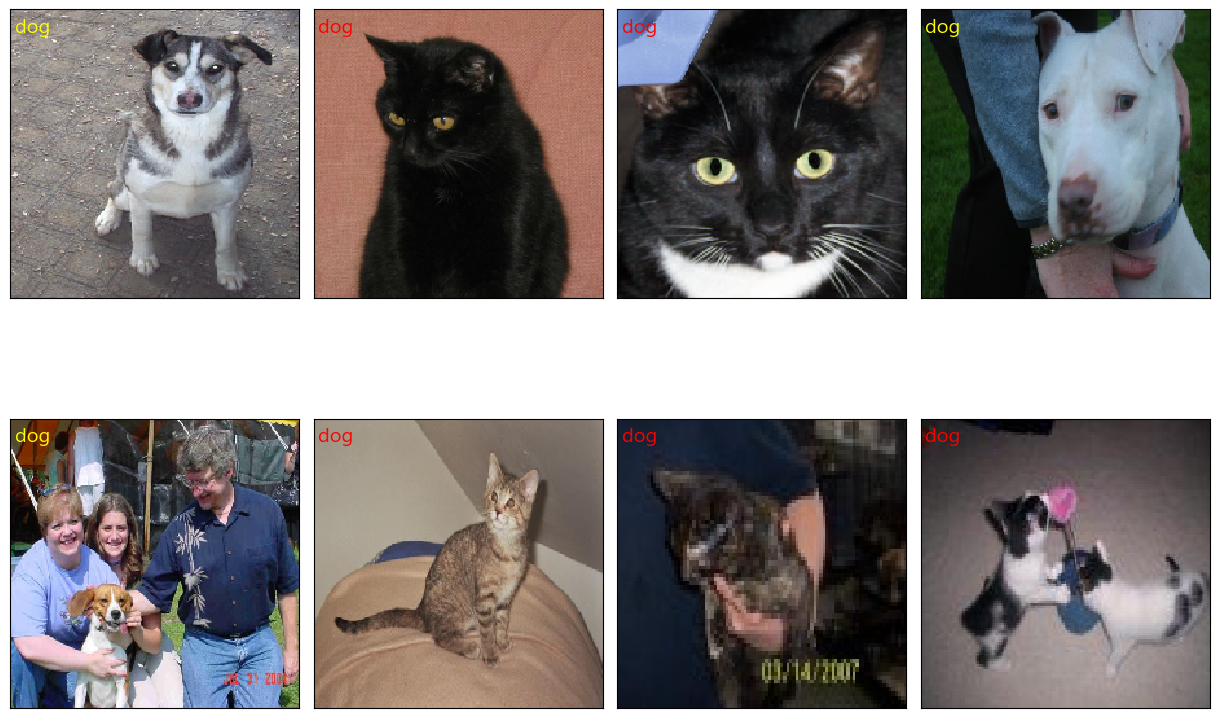

In [14]:
# 훈련된 모델 예측
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = np.argmax(model.predict(validation), axis=-1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)
        

In [ ]:
# 텐서플로 허브 사용!
# 텐서플로 허브를 사용하기 위해서 설치 : tensorflow_hub
# 텐서플로 허브는 일반화된 문제들에 대해 모델의 재사용성을 극대화하려고, 구글에서 공개한 API
# 텐서플로 허브는 모델에서 재사용 가능한 부분을 게시, 검색, 사용하기 위한 API를 제공.
# 텐서플로 허브 설치
%pip install tensorflow_hub

In [16]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import Layer, Input # Import Layer

class MyHubLayer(Layer): # keras.Layer를 상속받아서 구현.... 
    def __init__(self, handle):
        super(MyHubLayer, self).__init__()
        self.hub_layer = hub.KerasLayer(handle, trainable=False)

    def call(self, inputs):
        return self.hub_layer(inputs)

model = tf.keras.Sequential([
    Input((224,224,3)),
    MyHubLayer("https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/4"),  
    tf.keras.layers.Dense(2, activation='softmax')
])

In [17]:
# model 컴파일 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_hub_layer_2 (MyHubLayer)     │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,098 (16.01 KB)

 Trainable params: 4,098 (16.01 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 전처리 및 학습을 위한 변수 선언
BATCH_SIZE = 32
image_height = 224  # ResNet50에 Input Layer 값을 참조
image_width = 224
train_dir = './data/catanddog/train/'
valid_dir = './data/catanddog/validation/'


In [20]:
# 이미지 훈련 데이터 전처리 작업(ImageDataGenerator)
#1. 전처리 작업 객체 생성
train = ImageDataGenerator(
    rescale=1./255,         # 원본 영상을 RGB계수로 0~255값으로 구성됨. 1./255 스케일해서 0~1의 범위 변환
    rotation_range=10,      # 이미지 회전 범위. 10은 0 ~ 10도 범위내에 원본 이미지 회전
    width_shift_range=0.1,  # 그림을 수평으로 랜덤하게 평행이동. 넓이의 10% 내외로 이동
    height_shift_range=0.1, # 그림을 수직으로 랜덤하게 평행이동. 높이의 10% 내외로 이동
    shear_range=0.1,        # 원본 이미지를 임의로 변형. 라디안의 0.1 내외로 이미지 변환
    zoom_range=0.1          # 원본 이미지를 임의 확대/축소. 10% 내외로 확대 축소 변환
)

#2. 훈련 데이터 생성
train_generator = train.flow_from_directory(
    train_dir,                                  # 훈련 데이터 경로
    target_size=(image_height, image_width),    # 이미지 크기, 모든 이미지를 자동 조정
    color_mode='rgb',                           # 이미지 색상 모드. 'grayscale', 'rgb'
    batch_size=BATCH_SIZE,                      # 배치당 generator에서 생성한 이미지 개수
    seed=1,                                     # 이미지 임의로 섞기 위한 랜덤한 정수
    shuffle=True,                               # 이미지 섞어서 사용할 경우 True, False면 안 섞음.
    class_mode="categorical"                    # 예측가능한 클래스가 2개면 'binary', 그렇지 않으면 'categorical'
)

#검증 데이터 객체 생성
valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),    
    color_mode='rgb',                          
    batch_size=BATCH_SIZE,                      
    seed=7,                                     
    shuffle=True,                               
    class_mode="categorical" 
)


Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [21]:
# 훈련 실행
history = model.fit(train_generator, epochs=10, validation_data=valid_generator, verbose=2)

Epoch 1/10
13/13 - 31s - 2s/step - accuracy: 0.8286 - loss: 0.4694 - val_accuracy: 0.9286 - val_loss: 0.1880
Epoch 2/10
13/13 - 23s - 2s/step - accuracy: 0.9714 - loss: 0.1360 - val_accuracy: 0.9796 - val_loss: 0.0964
Epoch 3/10
13/13 - 24s - 2s/step - accuracy: 0.9792 - loss: 0.0722 - val_accuracy: 0.9694 - val_loss: 0.0763
Epoch 4/10
13/13 - 26s - 2s/step - accuracy: 0.9818 - loss: 0.0478 - val_accuracy: 0.9694 - val_loss: 0.0677
Epoch 5/10
13/13 - 25s - 2s/step - accuracy: 0.9922 - loss: 0.0384 - val_accuracy: 0.9796 - val_loss: 0.0596
Epoch 6/10
13/13 - 26s - 2s/step - accuracy: 0.9948 - loss: 0.0323 - val_accuracy: 0.9694 - val_loss: 0.0586
Epoch 7/10
13/13 - 27s - 2s/step - accuracy: 0.9922 - loss: 0.0330 - val_accuracy: 0.9694 - val_loss: 0.0599
Epoch 8/10
13/13 - 27s - 2s/step - accuracy: 0.9948 - loss: 0.0282 - val_accuracy: 0.9898 - val_loss: 0.0511
Epoch 9/10
13/13 - 27s - 2s/step - accuracy: 0.9974 - loss: 0.0252 - val_accuracy: 0.9796 - val_loss: 0.0493
Epoch 10/10
13/13 -

Text(0.5, 1.0, '오차')

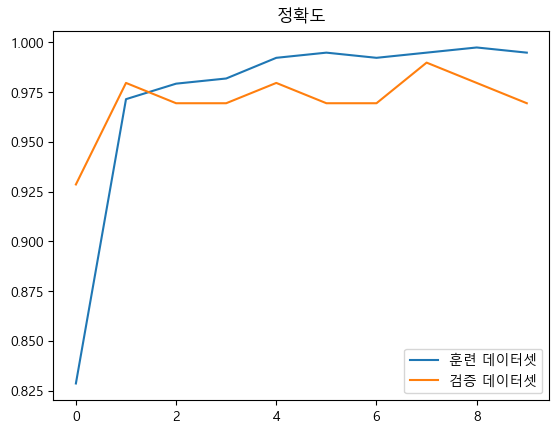

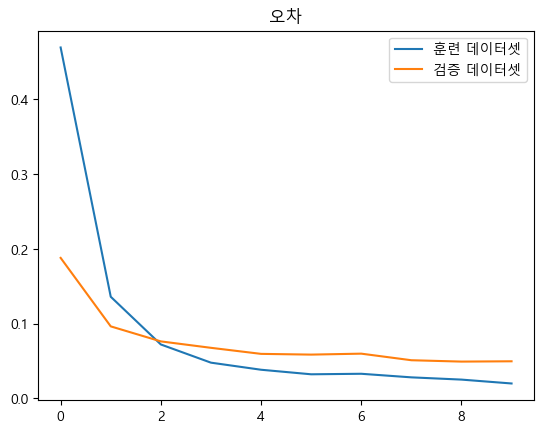

In [22]:
# 모델 정확도 그래프 그리기
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, label="훈련 데이터셋")
plt.plot(epochs, val_accuracy, label="검증 데이터셋")
plt.legend()
plt.title('정확도')
plt.figure()

plt.plot(epochs, loss, label="훈련 데이터셋")
plt.plot(epochs, val_loss, label="검증 데이터셋")
plt.legend()
plt.title('오차')

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


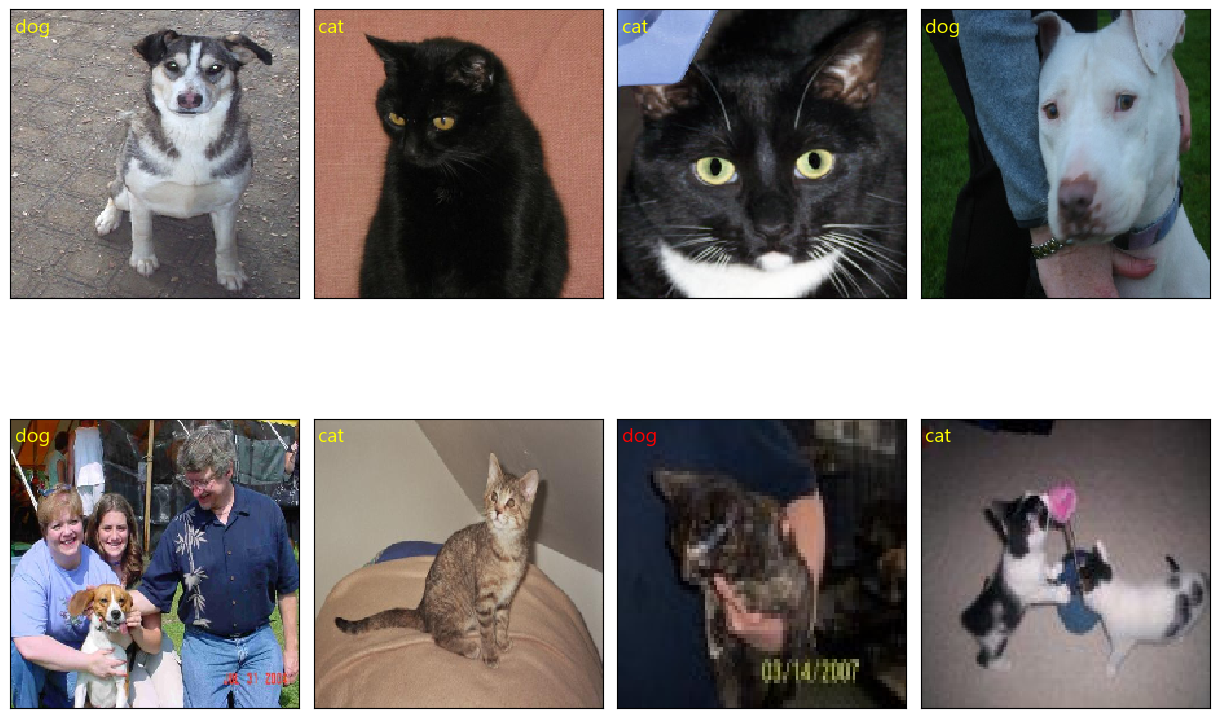

In [23]:
# 훈련된 모델 예측
class_names = ['cat', 'dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = np.argmax(model.predict(validation), axis=-1)

fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
    ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
    ax.imshow(validation[i,:], cmap=plt.cm.gray_r, interpolation='nearest')
    if prediction_values[i] == np.argmax(label_batch[i]):
        ax.text(3, 17, class_names[prediction_values[i]], color='yellow', fontsize=14)
    else:
        ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)
        